<a href="https://colab.research.google.com/github/bhartikapoor9634/Machine-Learning-Projects/blob/main/Classification_and_Clustering_on_Airline_Passenger_Satisfaction_Data_using_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf 
from tensorflow.keras.layers import Dense,Dropout
from keras.wrappers.scikit_learn import KerasClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
train_data=pd.read_csv('train.csv')
test_data=pd.read_csv('test.csv')

# **Checking null values in Training and Testing Dataset**

In [ ]:
train_data.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [ ]:
test_data.isnull().sum()

Unnamed: 0                            0
id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0


# **Filling Null values with Mode**

In [ ]:
value=train_data["Arrival Delay in Minutes"].mode()[0]
train_data["Arrival Delay in Minutes"].fillna(value,inplace=True)
train_data.drop("id",axis=1,inplace=True)

# **Handling Categorical Variables**

In [ ]:
col=[col for col in train_data.columns if train_data[col].dtype=="object" and train_data[col].nunique()<10]
col

['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']

In [ ]:
for c in col:
    print(c)
    print(train_data[c].unique())

Gender
['Male' 'Female']
Customer Type
['Loyal Customer' 'disloyal Customer']
Type of Travel
['Personal Travel' 'Business travel']
Class
['Eco Plus' 'Business' 'Eco']
satisfaction
['neutral or dissatisfied' 'satisfied']


In [ ]:
train_data["Gender"]=train_data["Gender"].map({"Male":0,"Female":1})
train_data["Customer Type"]=train_data["Customer Type"].map({"disloyal Customer":0,"Loyal Customer":1})
train_data["Type of Travel"]=train_data["Type of Travel"].map({"Personal Travel":0,"Business travel":1})
train_data["Class"]=train_data["Class"].map({"Eco":0,"Eco Plus":1,"Business":2})
train_data["satisfaction"]=train_data["satisfaction"].map({"neutral or dissatisfied":0,"satisfied":1})

In [ ]:
test_data.drop("id",axis=1,inplace=True)
test_data.drop("Unnamed: 0",axis=1,inplace=True)
train_data.drop("Unnamed: 0",axis=1,inplace=True)

test_data["Arrival Delay in Minutes"].fillna(value,inplace=True)

col=[col for col in test_data.columns if test_data[col].dtype=="object" and test_data[col].nunique()<10]
col

['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']

In [ ]:
test_data["Gender"]=test_data["Gender"].map({"Male":0,"Female":1})
test_data["Customer Type"]=test_data["Customer Type"].map({"disloyal Customer":0,"Loyal Customer":1})
test_data["Type of Travel"]=test_data["Type of Travel"].map({"Personal Travel":0,"Business travel":1})
test_data["Class"]=test_data["Class"].map({"Eco":0,"Eco Plus":1,"Business":2})
test_data["satisfaction"]=test_data["satisfaction"].map({"neutral or dissatisfied":0,"satisfied":1})

In [ ]:
train_data.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,1,13,0,1,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,0,0,25,1,2,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,1,1,26,1,2,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,1,1,25,1,2,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,0,1,61,1,2,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1


In [ ]:
test_data.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,1,52,1,0,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,1
1,1,1,36,1,2,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,1
2,0,0,20,1,0,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,0
3,0,1,44,1,2,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,1
4,1,1,49,1,0,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,1


# **EDA**

TypeError: ignored

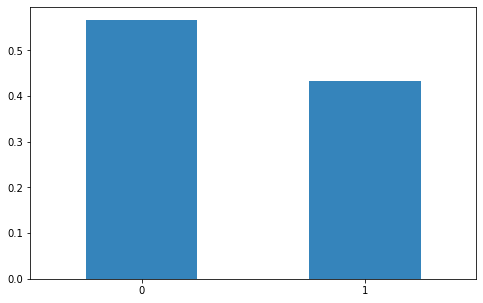

In [ ]:
# Checking the Target Class
#1- Satisfied   0- Neutral or Dissatisfied
fig = plt.figure(figsize = (8,5))
train_data.satisfaction.value_counts(normalize = True).plot(kind='bar', alpha = 0.9, rot=0)
plt.title('Checking Satisfaction Class')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


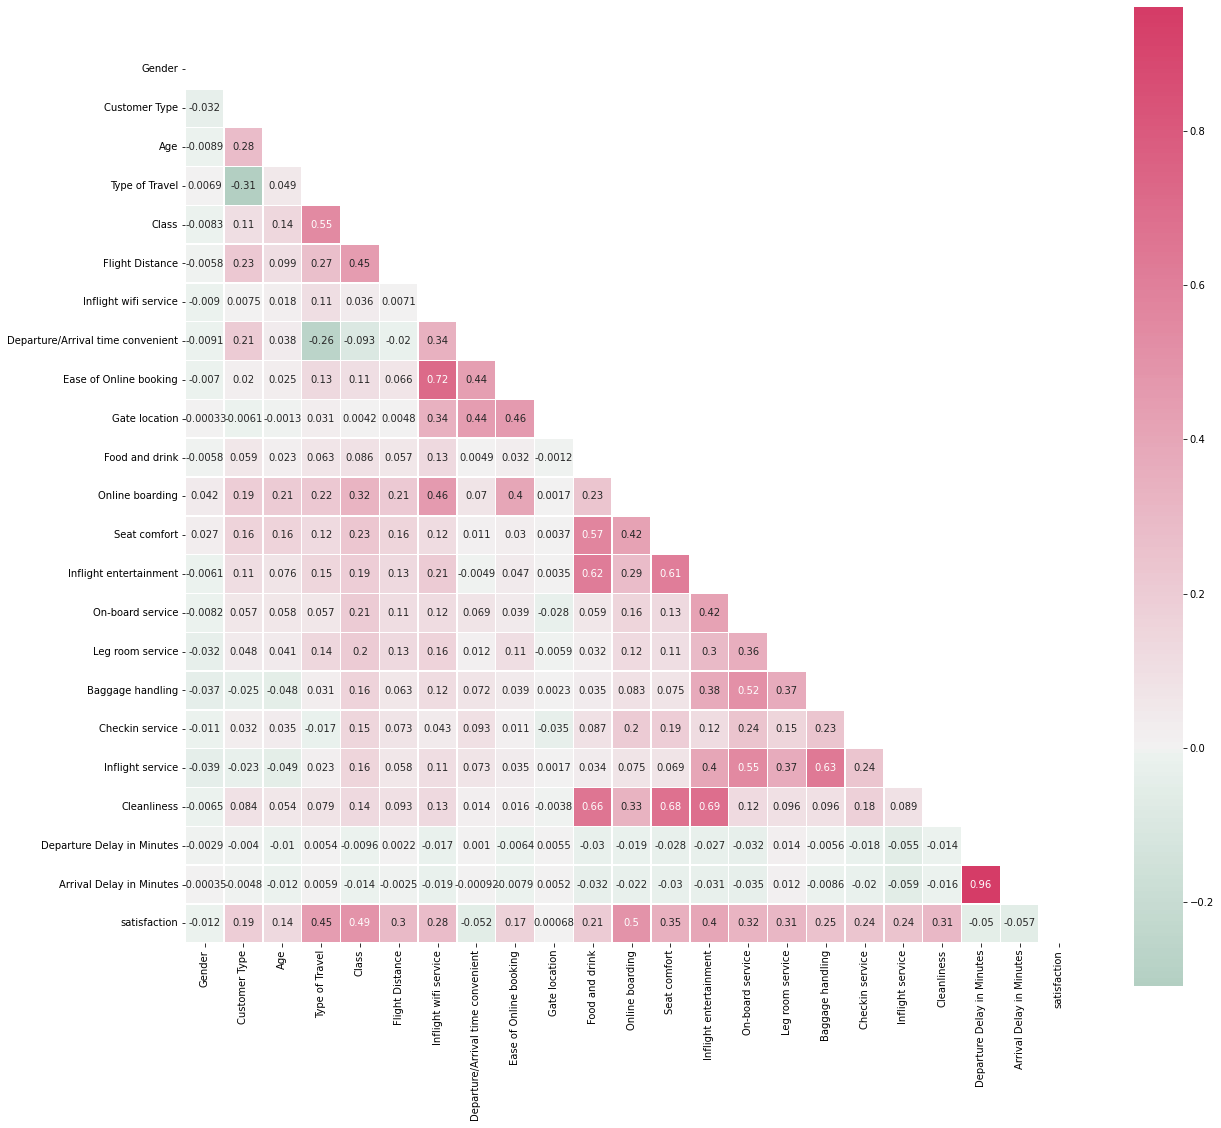

In [ ]:
corr = train_data.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(150, 1, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, 
            vmax=None, center=0,square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .9})

# **Preparing Training Data and Testing Data**

In [ ]:
features = ['Type of Travel', 'Class','Flight Distance','Inflight wifi service','Online boarding','Seat comfort',
            'Inflight entertainment','On-board service','Leg room service','Cleanliness','Checkin service', 
            'Inflight service', 'Baggage handling']
target = ['satisfaction']

# Split into test and train
X_train = train_data[features]
y_train = train_data[target].to_numpy()
X_test = test_data[features]
y_test = test_data[target].to_numpy()

# Normalize Features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
X_train.shape

(103904, 13)

In [ ]:
X_test.shape

(25976, 13)

# **Building ANN model**

In [ ]:
model= tf.keras.Sequential()

model.add(Dense(20, activation='relu',input_shape=(X_train.shape[1],) ))
model.add(Dropout(0.3))

model.add(Dense(20, activation='relu'))
model.add(Dropout(0.2))
#
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['AUC','accuracy'])

In [ ]:
hist=model.fit(X_train, y_train,validation_data=(X_test,y_test), epochs=20, batch_size=8, verbose=1)

Epoch 1/20
12988/12988 [==============================] - 32s 2ms/step - loss: 0.2869 - auc: 0.9453 - accuracy: 0.8853 - val_loss: 0.1977 - val_auc: 0.9775 - val_accuracy: 0.9206
Epoch 2/20
12988/12988 [==============================] - 34s 3ms/step - loss: 0.2207 - auc: 0.9686 - accuracy: 0.9100 - val_loss: 0.1746 - val_auc: 0.9816 - val_accuracy: 0.9267
Epoch 3/20
12988/12988 [==============================] - 38s 3ms/step - loss: 0.2046 - auc: 0.9732 - accuracy: 0.9174 - val_loss: 0.1734 - val_auc: 0.9824 - val_accuracy: 0.9277
Epoch 4/20
12988/12988 [==============================] - 31s 2ms/step - loss: 0.1997 - auc: 0.9745 - accuracy: 0.9190 - val_loss: 0.1721 - val_auc: 0.9817 - val_accuracy: 0.9296
Epoch 5/20
12988/12988 [==============================] - 31s 2ms/step - loss: 0.1985 - auc: 0.9748 - accuracy: 0.9199 - val_loss: 0.1709 - val_auc: 0.9825 - val_accuracy: 0.9323
Epoch 6/20
12988/12988 [==============================] - 30s 2ms/step - loss: 0.1964 - auc: 0.9752 - acc

In [ ]:
model.evaluate(X_test, y_test)[1]

812/812 [==============================] - 2s 3ms/step - loss: 0.1691 - auc: 0.9829 - accuracy: 0.9310


0.9829452633857727

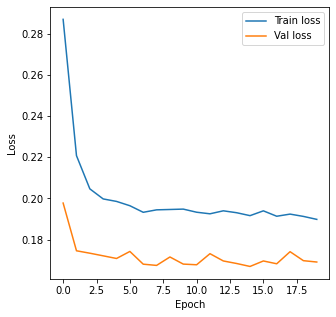

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train loss', 'Val loss'], loc='upper right')
plt.show()

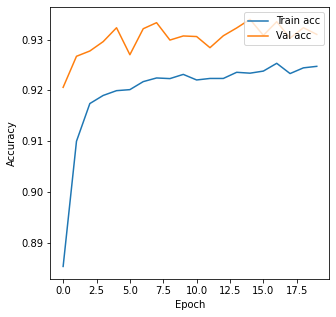

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train acc', 'Val acc'], loc='upper right')
plt.show()

# **Model Testing and Evaluation**

In [ ]:
ynew = model.predict(X_test)

In [ ]:
prediction_classes = [1 if prob > 0.5 else 0 for prob in np.ravel(ynew)]
print(classification_report(prediction_classes, y_test))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94     15431
           1       0.88      0.96      0.92     10545

    accuracy                           0.93     25976
   macro avg       0.93      0.93      0.93     25976
weighted avg       0.93      0.93      0.93     25976



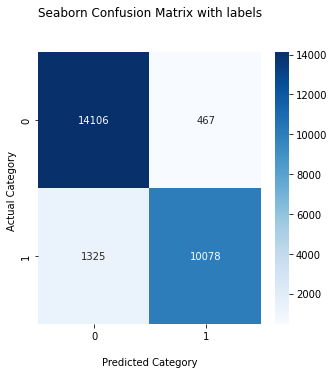

In [ ]:
#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test,prediction_classes)


plt.figure(figsize=(5, 5))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues',fmt="d")

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Category')
ax.set_ylabel('Actual Category ');


## Display the visualization of the Confusion Matrix.
plt.show()

# **Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)

y_pred = model_dt.predict(X_test)

              precision    recall  f1-score   support

           0       0.94      0.94      0.94     14573
           1       0.92      0.92      0.92     11403

    accuracy                           0.93     25976
   macro avg       0.93      0.93      0.93     25976
weighted avg       0.93      0.93      0.93     25976



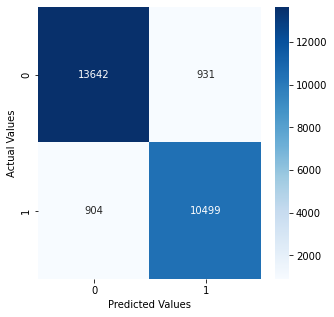

In [ ]:
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, cmap = 'Blues', fmt = '.8g')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

plt.show()

# **Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

y_pred_rf = model_rf.predict(X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


              precision    recall  f1-score   support

           0       0.95      0.97      0.96     14573
           1       0.96      0.93      0.94     11403

    accuracy                           0.95     25976
   macro avg       0.95      0.95      0.95     25976
weighted avg       0.95      0.95      0.95     25976



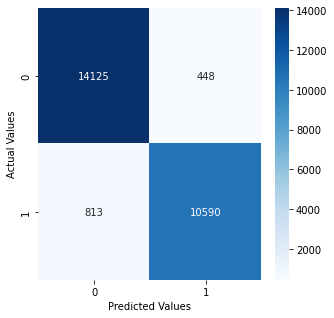

In [ ]:
print(classification_report(y_test, y_pred_rf))

cm = confusion_matrix(y_test, y_pred_rf)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, cmap = 'Blues', fmt = '.8g')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

plt.show()

# **Naive Bayes Classifier**

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

y_pred_nb = nb.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.86      0.88      0.87     14573
           1       0.84      0.82      0.83     11403

    accuracy                           0.85     25976
   macro avg       0.85      0.85      0.85     25976
weighted avg       0.85      0.85      0.85     25976



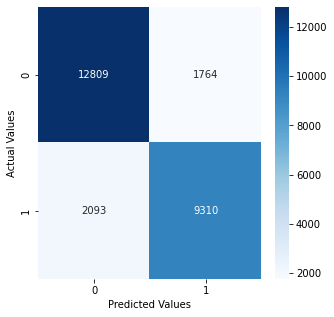

In [ ]:
print(classification_report(y_test, y_pred_nb))

cm = confusion_matrix(y_test, y_pred_nb)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, cmap = 'Blues', fmt = '.8g')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

plt.show()

# **Clustering**

TypeError: ignored

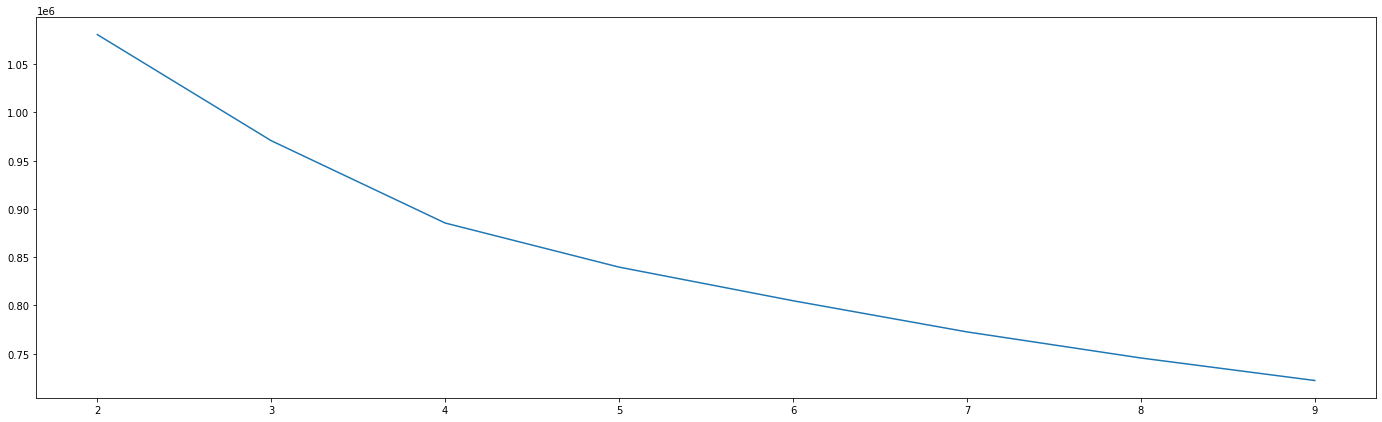

In [ ]:
from sklearn.cluster import KMeans

# Elbow method
wcss = []
for i in range(2, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(24,7))
plt.plot(range(2, 10), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:

kmeans = KMeans(n_clusters = 4, init = 'k-means++')
df=kmeans.fit_predict(X_train)

In [ ]:
train_data['Cluster']= df

In [ ]:
train_data.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Cluster
0,0,1,13,0,1,460,3,4,3,1,...,4,3,4,4,5,5,25,18.0,0,0
1,0,0,25,1,2,235,3,2,3,3,...,1,5,3,1,4,1,1,6.0,0,1
2,1,1,26,1,2,1142,2,2,2,2,...,4,3,4,4,4,5,0,0.0,1,2
3,1,1,25,1,2,562,2,5,5,5,...,2,5,3,1,4,2,11,9.0,0,1
4,0,1,61,1,2,214,3,3,3,3,...,3,4,4,3,3,3,0,0.0,1,2


In [ ]:
train_data

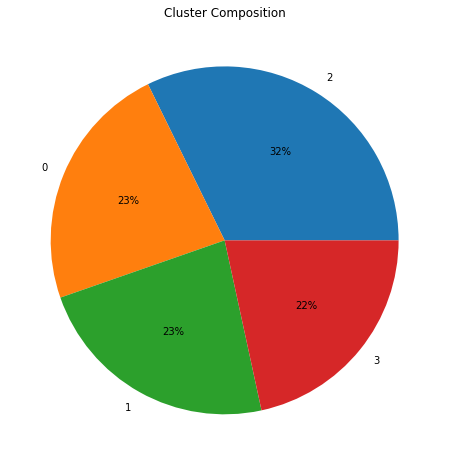

In [ ]:
fig, axs = plt.subplots(figsize=(12,8))
ax = train_data['Cluster'].value_counts().plot.pie(title='Cluster Composition', autopct='%1.0f%%')
plt.title=False
ax.set_ylabel('')
plt.show()

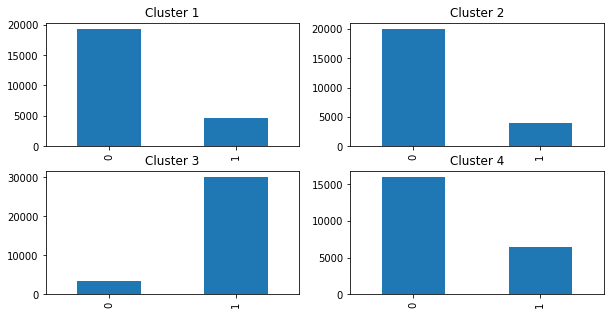

In [ ]:
fig, axs = plt.subplots(ncols=2,nrows=2, figsize=(10,5))

train_data[train_data['Cluster'] == 0]['satisfaction'].value_counts().sort_index().plot.bar(ax=axs[0,0], title='Cluster 1')
train_data[train_data['Cluster'] == 1]['satisfaction'].value_counts().sort_index().plot.bar(ax=axs[0,1], title='Cluster 2')
train_data[train_data['Cluster'] == 2]['satisfaction'].value_counts().sort_index().plot.bar(ax=axs[1,0], title='Cluster 3')
train_data[train_data['Cluster'] == 3]['satisfaction'].value_counts().sort_index().plot.bar(ax=axs[1,1], title='Cluster 4')

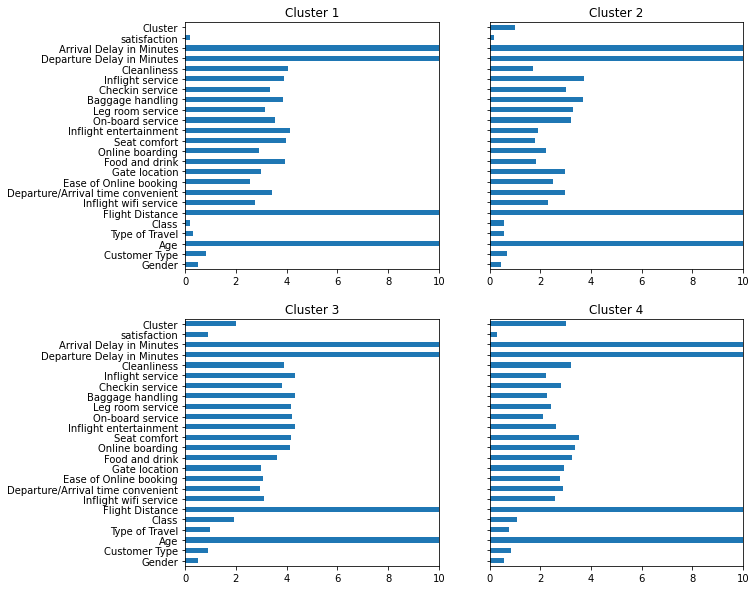

In [ ]:
fix, axs = plt.subplots(ncols=2,nrows=2, figsize=(20,32))

train_data[train_data['Cluster'] == 0][train_data.columns].mean().plot.barh(
    ax=axs[0,0], xlim=(0, 10), figsize=(10,10), sharey=True, title='Cluster 1')

train_data[train_data['Cluster'] == 1][train_data.columns].mean().plot.barh(
    ax=axs[0,1], xlim=(0, 10), figsize=(10,10), sharey=True, title='Cluster 2')

train_data[train_data['Cluster'] == 2][train_data.columns].mean().plot.barh(
    ax=axs[1,0], xlim=(0, 10), figsize=(10,10), sharey=True, title='Cluster 3')

train_data[train_data['Cluster'] == 3][train_data.columns].mean().plot.barh(
    ax=axs[1,1], xlim=(0, 10), figsize=(10,10), sharey=True, title='Cluster 4')